<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 3

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: Notation 

### Problem 1.1 (Exam Style)

a = 0. b = (1,0)

### Problem 1.2 (Exam Style)

A circle in the real plane with radius 2 centered at point (1,0).

### Problem 1.3 (Exam Style)

1. c < 0.
2. c = 0. point is (1,0).

### Problem 1.4 (Exam Style)

An annulus in the real plane with inner radius 2 and outer radius 3 centered at (1,0).

i.e. the locus of points with Euclidean distance between 2 and 3, inclusive, from point (1,0).

## Part 2: Momentum 

### Problem 2.1 (Exam Style)

$ \nabla q(z) = 
\begin{bmatrix}
z_0 - 3 \\
2z_1
\end{bmatrix}
$

### Problem 2.1 (Exam Style)

$ v_{k+1} = \mu_k v_k - \alpha_k \nabla q(z_k) $

$ z_{k+1} = z_k + v_{k+1} $

$v_0 = [0,0]$

$z_0 = [4,2]$

$v_1 = 0.5 \cdot [0,0] - 0.1 \cdot [1,4] = [-0.1,-0.4]$

$z_1 = [4,2]+[-0.1,-0.4] =[3.9,1.6]$

$v_2 = 0.5 \cdot [-0.1,-0.4] - 0.1 \cdot [0.9,3.2] = [-0.14,-0.52]$

$z_2 = [3.9,1.6] + [-0.14,-0.52] = [3.76,1.08]$

### Problem 2.2

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def gradient_descent(g, z0, mu = 0.5, alpha=0.1, delta=1.e-6, k_max=30, store=True):
    v_old = np.zeros(len(z0))
    z, z_old = z0, z0.copy()
    history = [z] if store else None
    for k in range(k_max):
        v = mu * v_old - alpha * g(z_old)
        z = z_old + v
        if store:
            history.append(z)
        if np.linalg.norm(z - z_old) <= delta:
            return (z, history) if store else z
        v_old = v
        z_old = z
    print('warning: maximum iterations exceeded')
    return (z, history) if store else z

In [4]:
def g(z):
    return np.array([z[0] - 3, 2*z[1]])

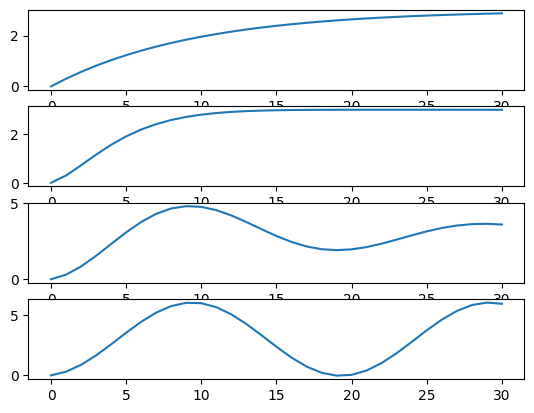

In [26]:
z0 = np.zeros(2)

fig, ax = plt.subplots(4)

for i, mu in enumerate([0, 0.5, 0.9, 1]):
    z, history = gradient_descent(g, z0, mu)

    ks = np.arange(len(history))
    xs = np.array([arr[0] for arr in history])
    ax[i].plot(ks, xs)

plt.show()

### Problem 2.3 (Exam Style)

## Part 3: Automatic Differentiation

In [10]:
from autograd import numpy as anp
from autograd import elementwise_grad as gradient

### Problem 3.1 (Exam Style except for the Plots)

### Problem 3.2

In [22]:
def ah(x, z):
    a, b = z[0], z[1]
    return 1 / (1 + a * anp.exp(-b * x))

## Part 4: Stochastic Gradient Descent 

In [28]:
def batch_index_generator(n_samples, batch_size, rg):
    batch = rg.permutation(n_samples)
    start, stop = 0, batch_size
    while stop < n_samples:
        yield batch[start:stop]
        start += batch_size
        stop += batch_size
    stop = min(stop, n_samples)
    yield batch[start:stop]

### Problem 4.1 (Exam Style)

### Problem 4.2

In [30]:
def gradient_descent(g, z0, alpha=0.01, delta=1.e-6, k_max=100000, store=True):
    z, z_old = z0, z0.copy()
    history = [z] if store else None
    for k in range(k_max):
        z = z_old - alpha * g(z_old)
        if store:
            history.append(z)
        if np.linalg.norm(z - z_old) <= delta:
            return (z, history) if store else z
        z_old = z
    print('warning: maximum iterations exceeded')
    return (z, history) if store else z

In [31]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [32]:
def retrieve(file_name, semester='fall25', homework=3):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [33]:
file_name = 'logistic_samples.pkl'
retrieve(file_name)
with open(file_name, "rb") as file:
    training_set = pickle.load(file)

Using previously downloaded file logistic_samples.pkl


In [34]:
def hz(z, x):
    a, b = np.array(z[0]), np.array(z[1])
    return 1 / (1 + a[..., np.newaxis] * np.exp(- b[..., np.newaxis] * x))

In [35]:
def risk(z, x, y):
    y_hat = hz(z, x)
    return np.squeeze(np.mean((y[np.newaxis, np.newaxis, ...] - y_hat) ** 2, axis=-1))

### Problem 4.3 (Exam Style)